<a href="https://colab.research.google.com/github/Sara2539360/Excel/blob/main/e_commerce_shipping_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## E-Commerce Shipping Data

## Introduction
In this project, we aim to predict the on-time delivery of products based on several customer and shipment-related features. The dataset includes various factors such as the warehouse block, mode of shipment, customer care calls, customer ratings, prior purchases, product importance, gender, discount offered, and product weight. The target variable is whether the product reached on time (binary classification: 1 for late, 0 for on-time).

By analyzing and building predictive models on this data, we can help the company improve its logistics and customer satisfaction by identifying the factors that contribute to late deliveries and optimizing its processes.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [6]:
# loading data
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Sara2539360/MLFinal-E-Comm/refs/heads/main/Train%20(1).csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [7]:
df.shape

(10999, 12)

In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


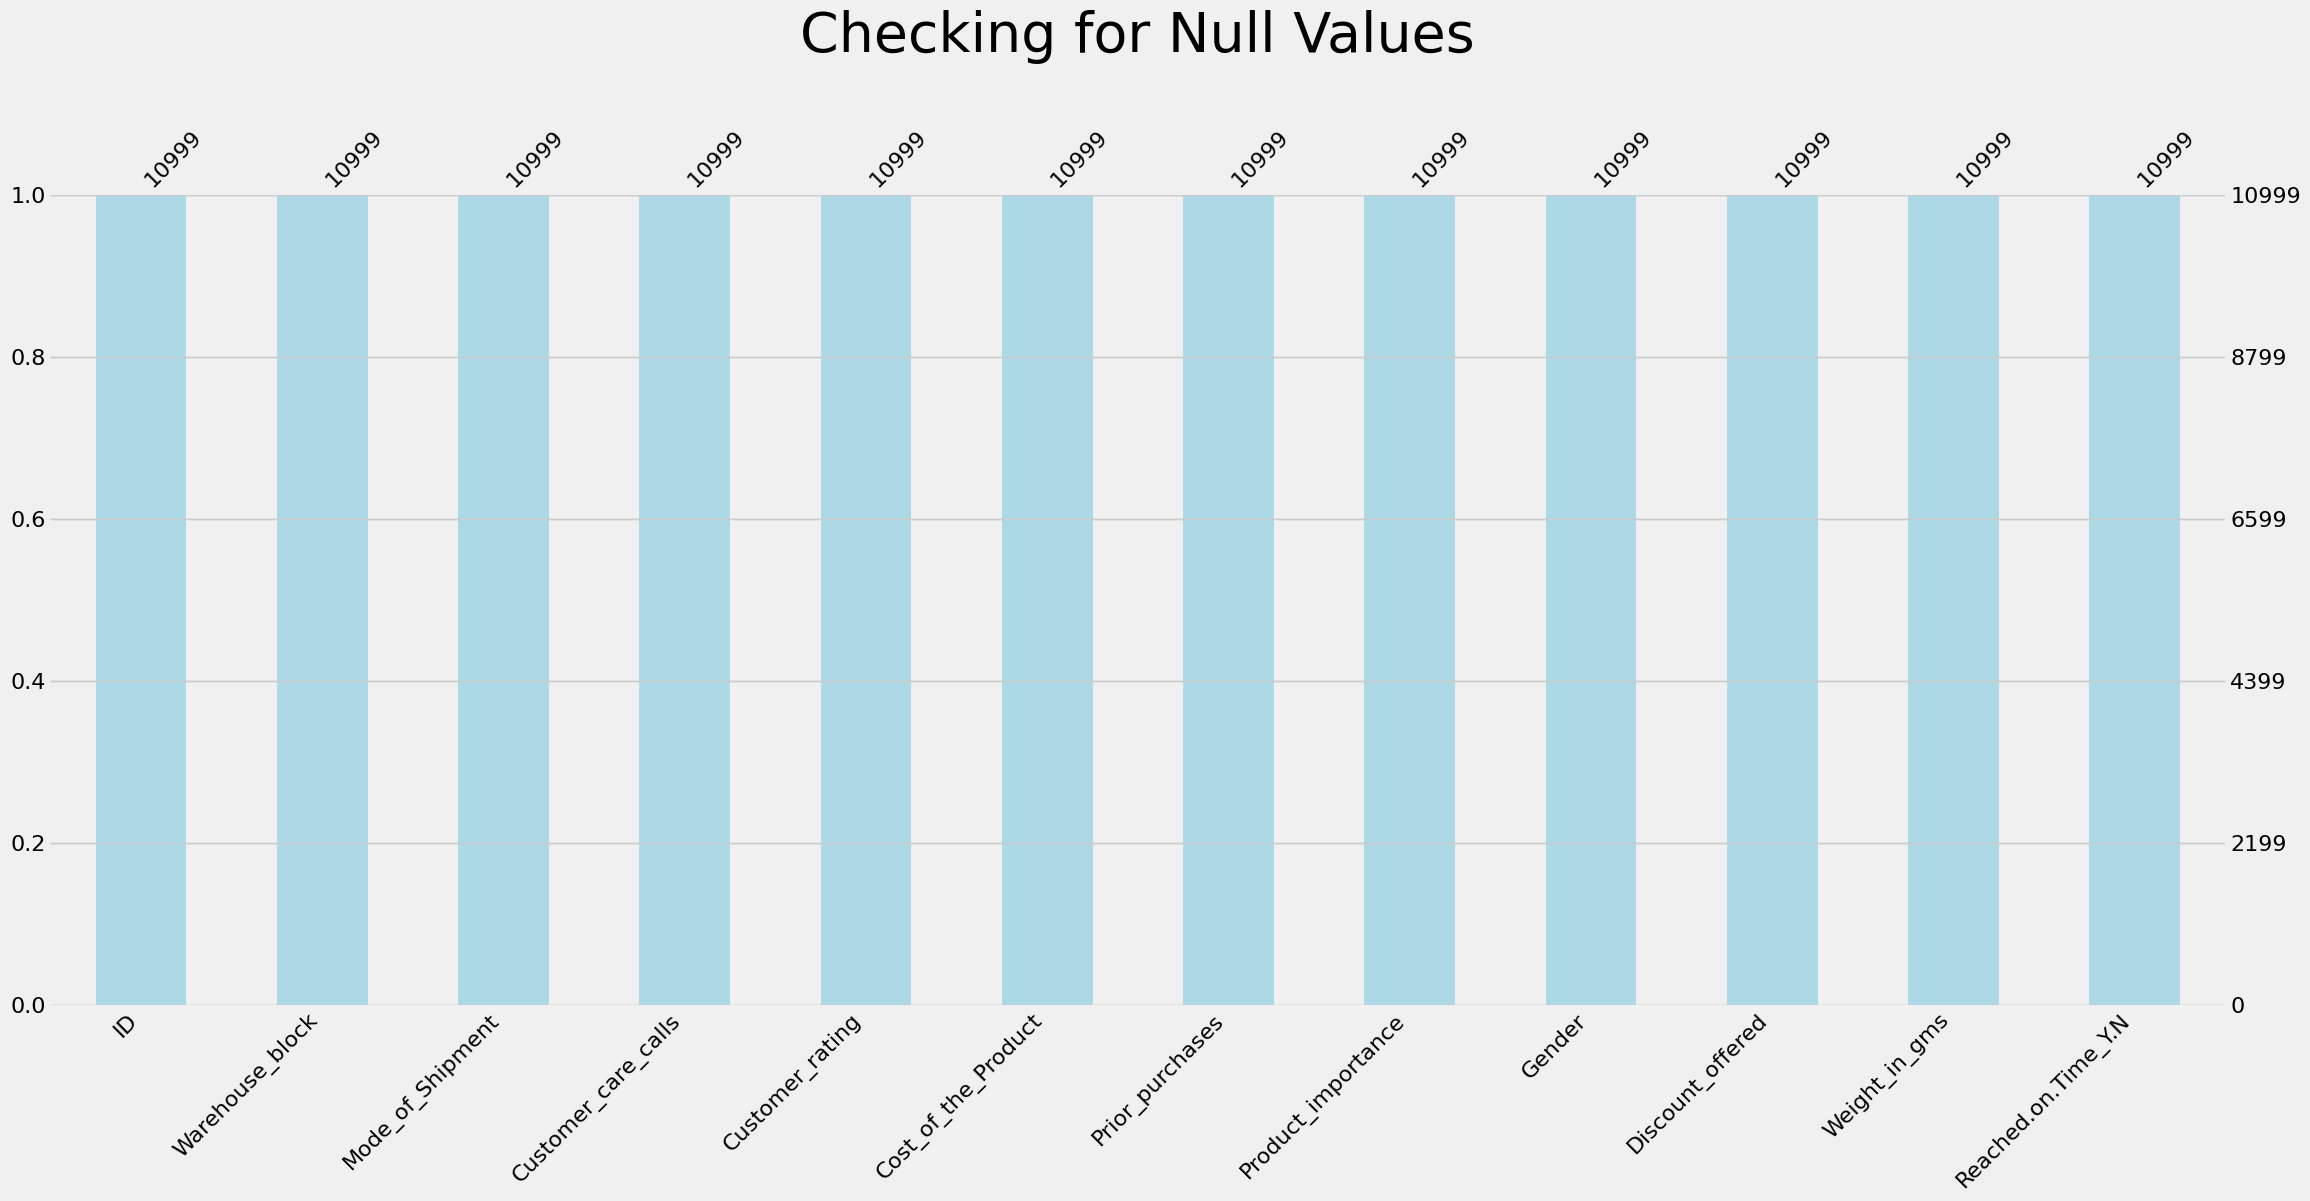

In [10]:
import missingno as msno
msno.bar(df, color = 'lightblue')
plt.title('Checking for Null Values\n', fontsize = 40)
plt.show()

In [11]:
df.drop('ID', axis = 1, inplace = True)
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


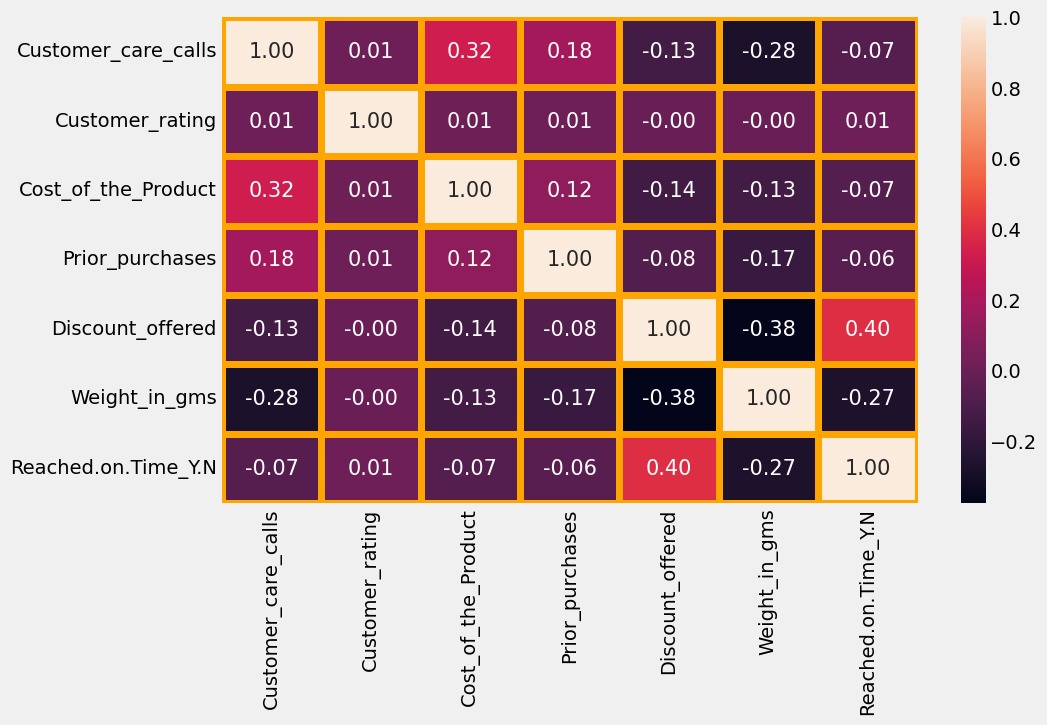

In [12]:
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, fmt='0.2f', annot_kws={'size': 15}, linewidth=5, linecolor='orange')
plt.show()


Conclusions from Correlation matrix :-
- Discount Offered have high positive correlation with Reached on Time or Not of 40%.
- Weights in gram have negative correlation with Reached on Time or Not -27%.
- Discount Offered and weights in grams have negative correlation -38%.
- Customer care calls and weights in grams havenegative correlation -28%.
- Customer care calls and cost of the product have positive correlation of 32%.
- Prior Purchases and Customer care calls have slightly positive correlation.

In [13]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Exploratory Data Analysis (EDA)

**Checking value counts of categorical columns**

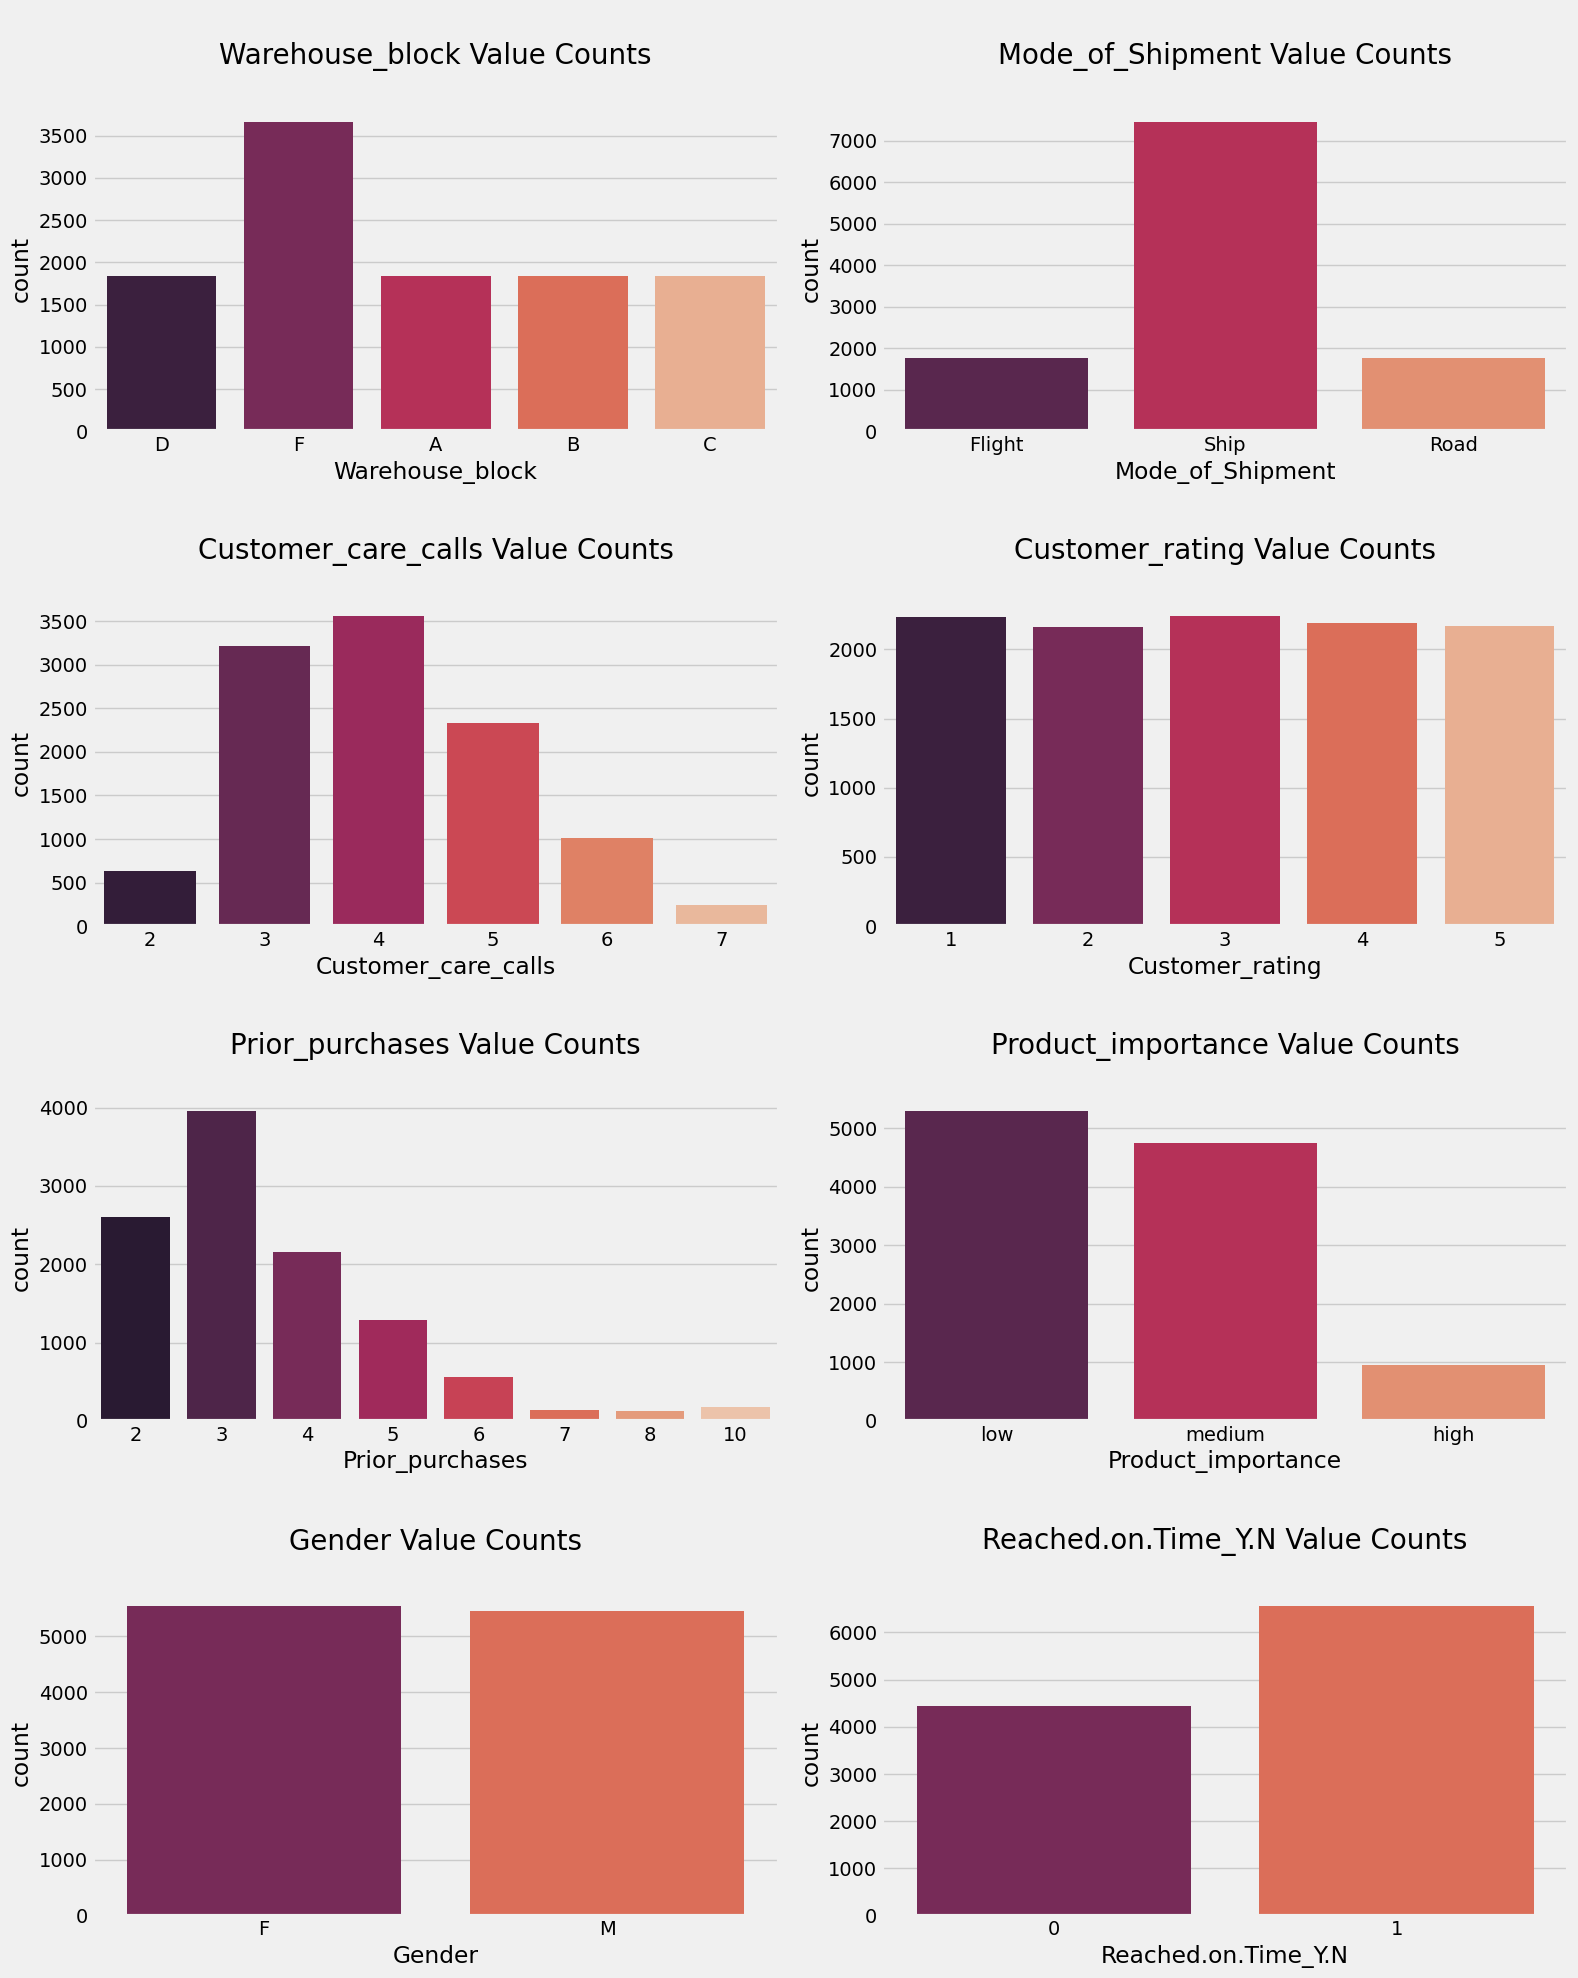

In [14]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating',
        'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

From the above plots, we can conclude following:-
- Warehouse block F have has more values than all other Warehouse blocks.
- In mode of shipment columns we can clearly see that ship delivers the most of products to the customers.
- Most of the customers calls 3 or 4 times to the customer care centers.
- Customer Ratings does not have much variation.
- Most of the customers have 3 prior purchases.
- We can say that mopst of the products are of low Importance.
- Gender Column doesn't have much variance.
- More products doesn't reach on time than products reached on time.


### Exploring relation of categorical columns with reached on time or not

In [15]:
object_columns = df.select_dtypes(include = ['object'])
object_columns.head()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F


### Ware_house block

In [16]:
warehouse = object_columns['Warehouse_block'].value_counts().reset_index()
warehouse.columns = ['warehouse', 'value_counts']
fig = px.pie(warehouse, names = 'warehouse', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

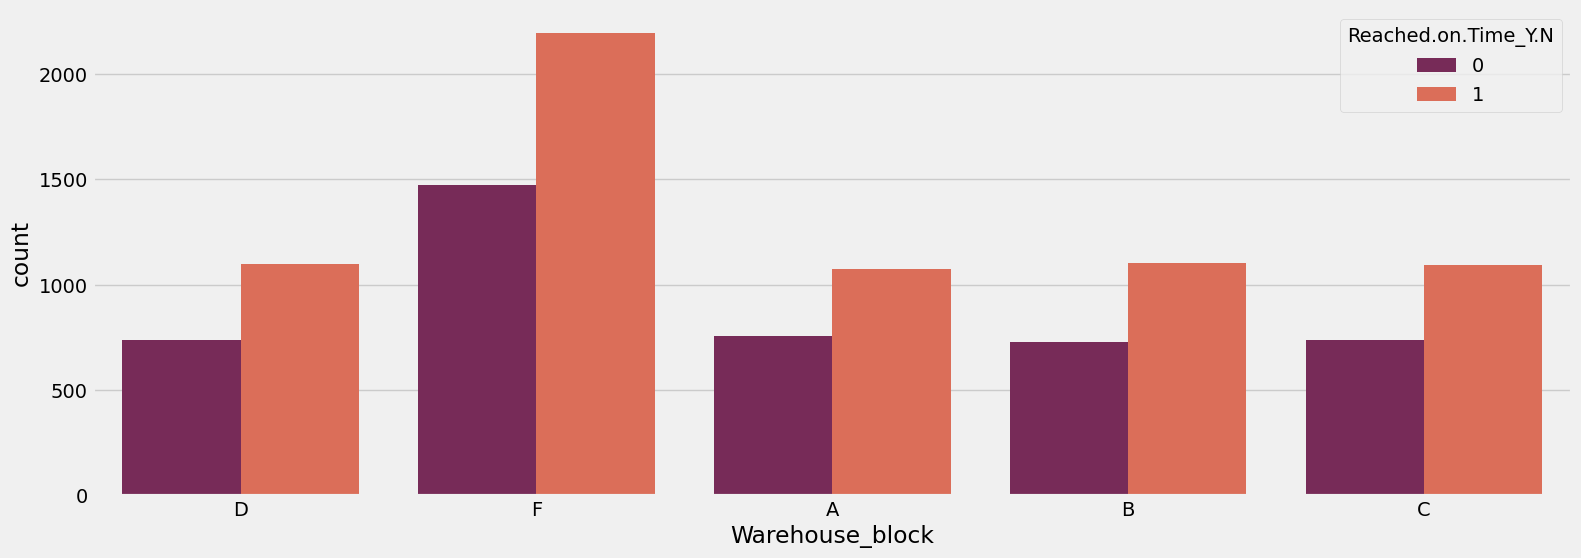

In [17]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=df, palette='rocket')
plt.show()

### gender

In [18]:
gender = object_columns['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'value_counts']
fig = px.pie(gender, names = 'Gender', values = 'value_counts', color_discrete_sequence =
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

### Mode of shipment

In [19]:
mode = object_columns['Mode_of_Shipment'].value_counts().reset_index()
mode.columns = ['Mode_of_Shipment', 'value_counts']
fig = px.pie(mode, names = 'Mode_of_Shipment', values = 'value_counts', color_discrete_sequence =
            px.colors.sequential.Darkmint_r, width = 650, height = 400, hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

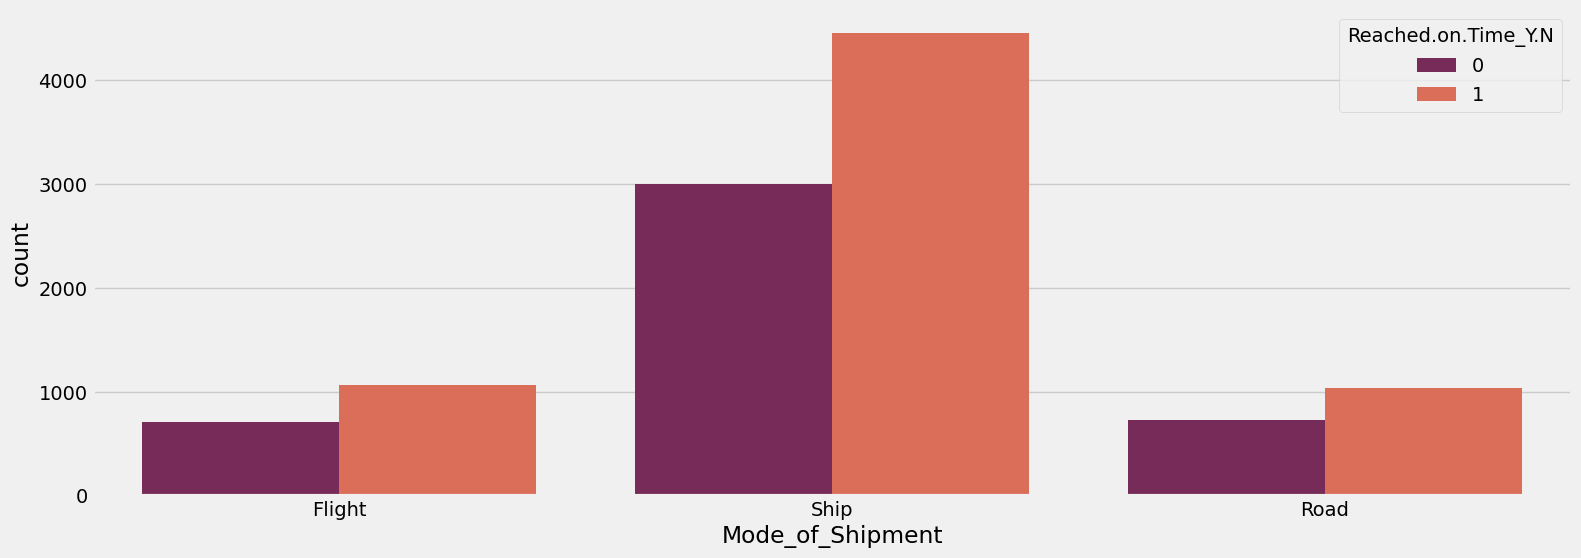

In [20]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=df, palette='rocket')
plt.show()


### Product importance

In [21]:
product_imp = object_columns['Product_importance'].value_counts().reset_index()
product_imp.columns = ['Product_importance', 'value_counts']
fig = px.pie(product_imp, names = 'Product_importance', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
             hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

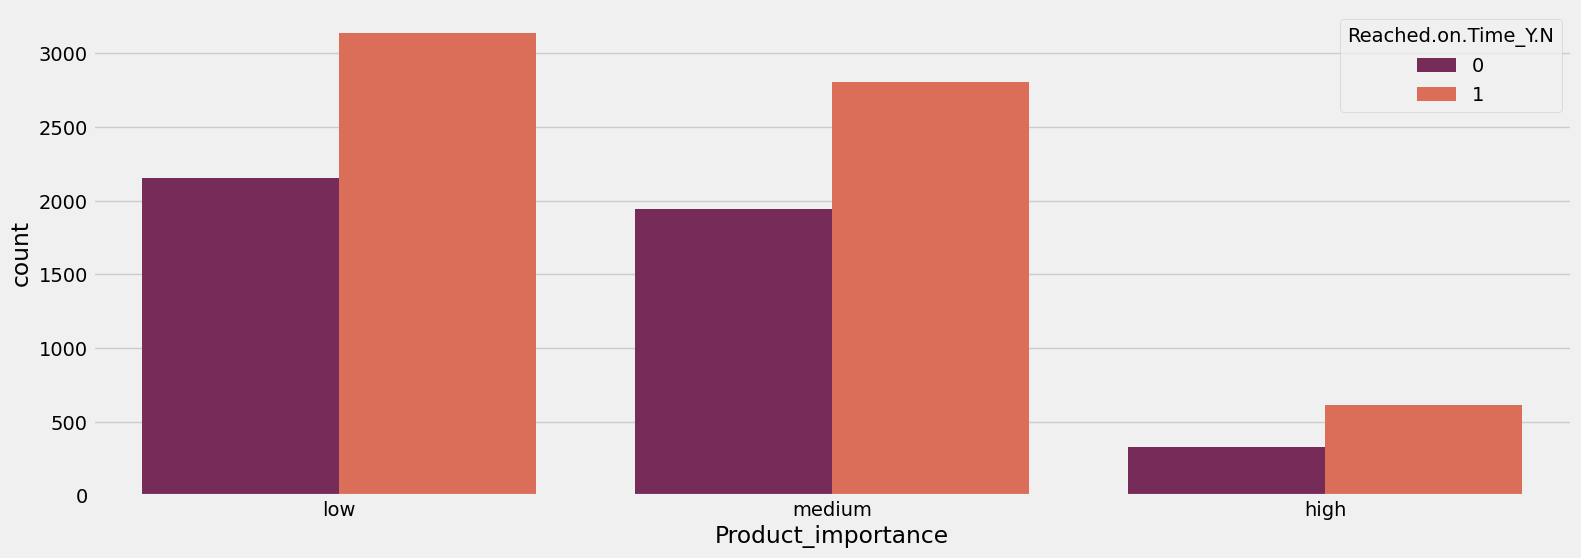

In [22]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=df, palette='rocket')
plt.show()


### Exploring relation of continuous columns with reached on time or not

In [23]:
integer_columns = df.select_dtypes(include = ['int64'])
integer_columns.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,44,1233,1
1,4,5,216,2,59,3088,1
2,2,2,183,4,48,3374,1
3,3,3,176,4,10,1177,1
4,2,2,184,3,46,2484,1


### Customer_care calls

In [24]:
customer_care = integer_columns['Customer_care_calls'].value_counts().reset_index()
customer_care.columns = ['Customer_care_calls', 'value_counts']
fig = px.pie(customer_care, names = 'Customer_care_calls', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

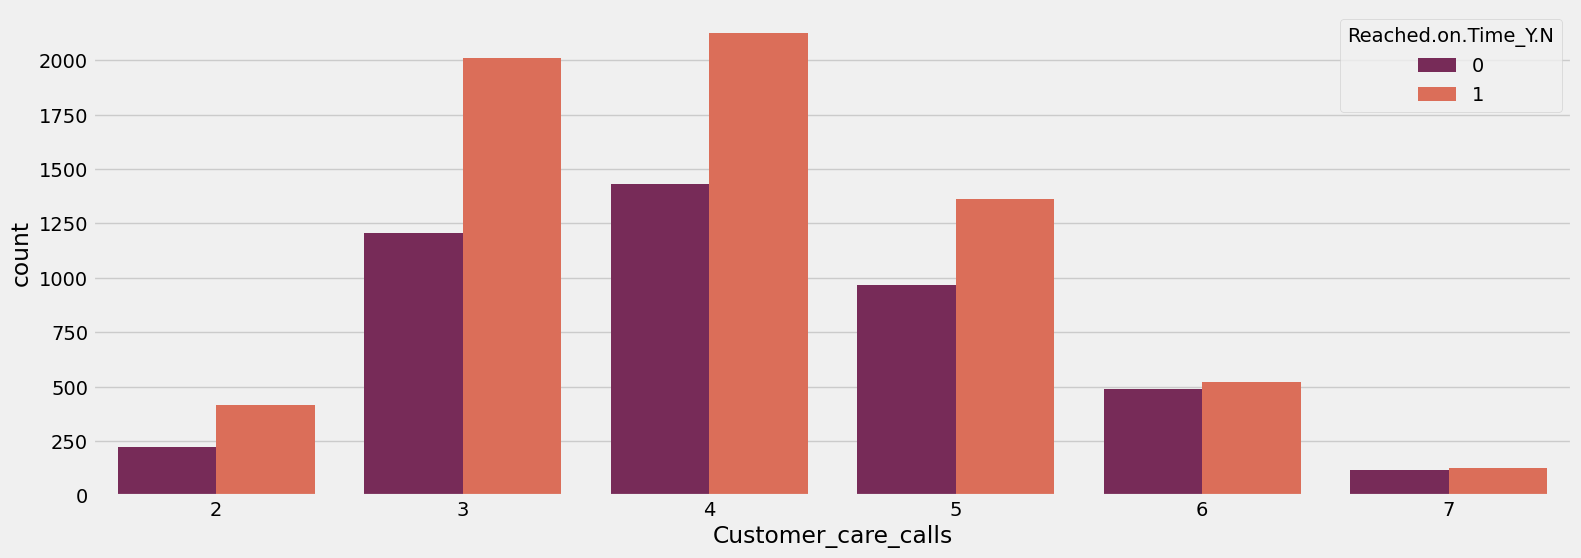

In [25]:
plt.figure(figsize=(17, 6))
sns.countplot(x='Customer_care_calls', hue='Reached.on.Time_Y.N', data=df, palette='rocket')
plt.show()

### Customer ratings

In [26]:
customer_ratings = integer_columns['Customer_rating'].value_counts().reset_index()
customer_ratings.columns = ['Customer_rating', 'value_counts']
fig = px.pie(customer_ratings, names = 'Customer_rating', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

### Prior_Purchases

In [27]:
prior_purchases = integer_columns['Prior_purchases'].value_counts().reset_index()
prior_purchases.columns = ['Prior_purchases', 'value_counts']
fig = px.pie(prior_purchases, names = 'Prior_purchases', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.matter_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

### Reached on Time Delivery

In [28]:
reached_on_time_y_n = integer_columns['Reached.on.Time_Y.N'].value_counts().reset_index()
reached_on_time_y_n.columns = ['Reached.on.Time_Y.N', 'value_counts']
fig = px.pie(reached_on_time_y_n, names = 'Reached.on.Time_Y.N', values = 'value_counts',
             color_discrete_sequence = px.colors.sequential.Darkmint_r, width = 650, height = 400,
            hole = 0.5)
fig.update_traces(textinfo = 'percent+label')

### Cost of the product

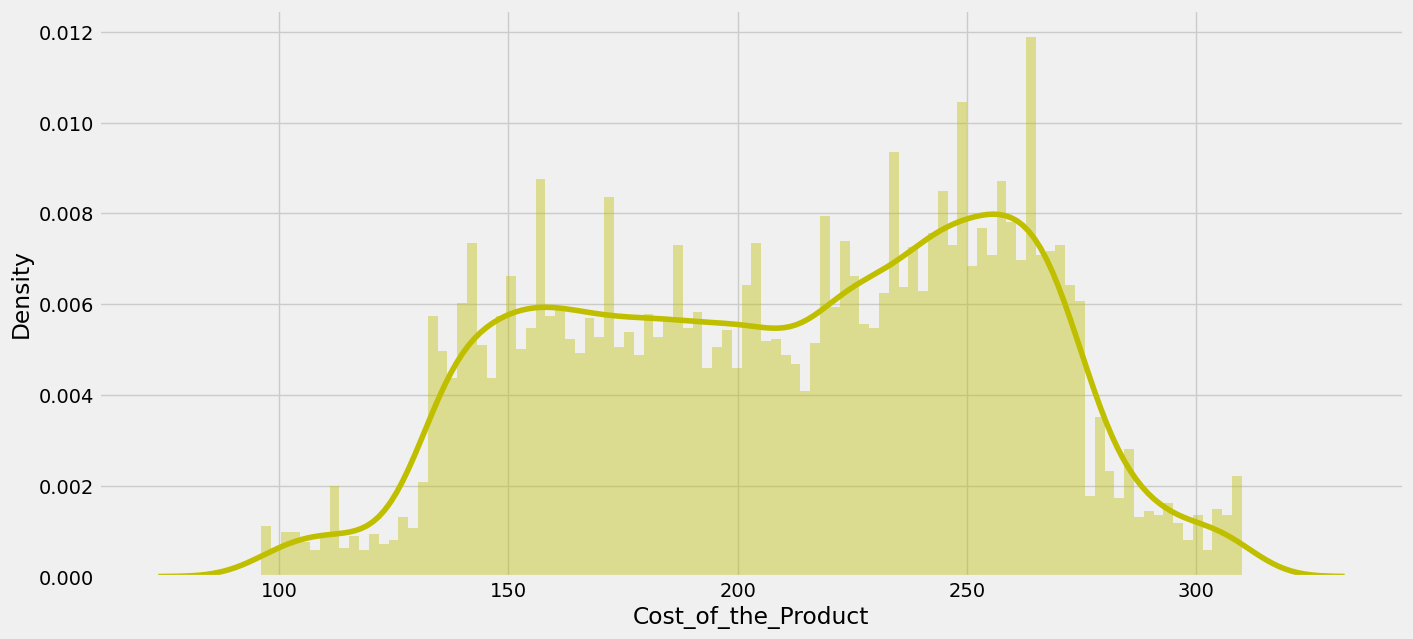

In [29]:
# making a distplot of cost of the product column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Cost_of_the_Product'], bins = 100, color = 'y')
plt.show()

In [30]:
# looking at the relation between cost of the product and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product',
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### Discount Offered

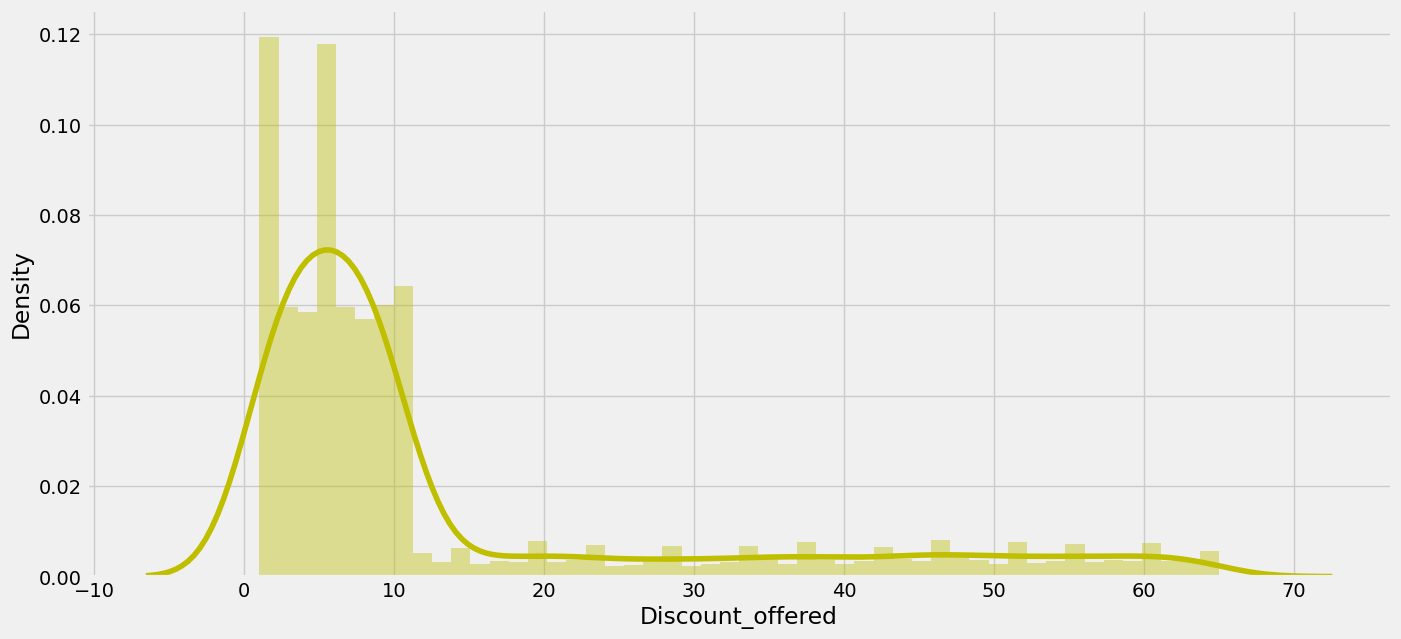

In [31]:
plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Discount_offered'], color = 'y')
plt.show()

In [32]:
# looking at the relation between discount offered and whether the product reached on time or not using boxplot

px.box(data_frame = df, x = 'Reached.on.Time_Y.N', y = 'Discount_offered',
       color = 'Reached.on.Time_Y.N', template = 'plotly_dark')

### Weights in Grams

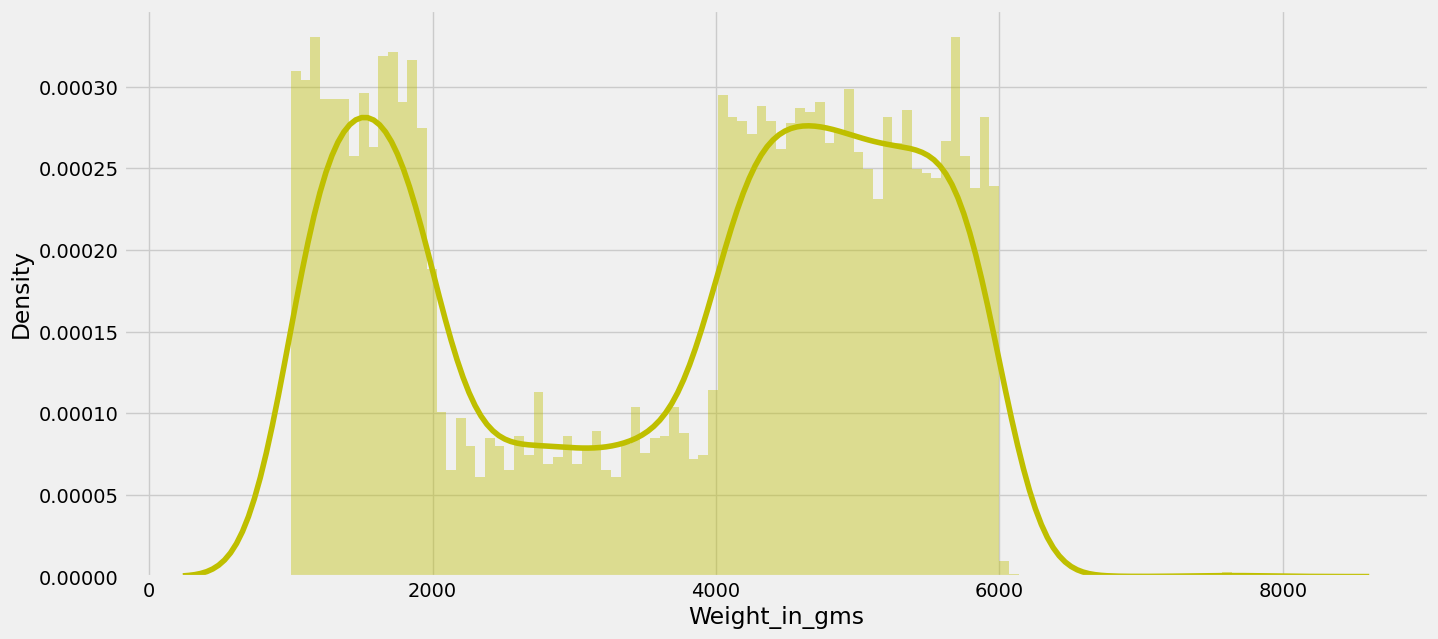

In [33]:
# making a distplot of weights in gram column

plt.figure(figsize = (15, 7))
ax = sns.distplot(df['Weight_in_gms'], bins = 100, color = 'y')

plt.show()

In [34]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


## Which mode of shipmemnt carries most weights ?

In [35]:
shipment_mode_weight = df.groupby(['Mode_of_Shipment'])['Weight_in_gms'].sum().reset_index()
shipment_mode_weight

,Mode_of_Shipment,Weight_in_gms
0,Flight,6449405
1,Road,6423209
2,Ship,27097936


In [36]:
px.histogram(data_frame = df, x = 'Weight_in_gms', nbins = 100, color = 'Mode_of_Shipment',
             marginal = 'box', template = 'plotly_dark')

- Ship is the mode of shipment throuh which most of the products were delivered

### Relation Between Customer Care Calls, Product importance and Prior Purchases

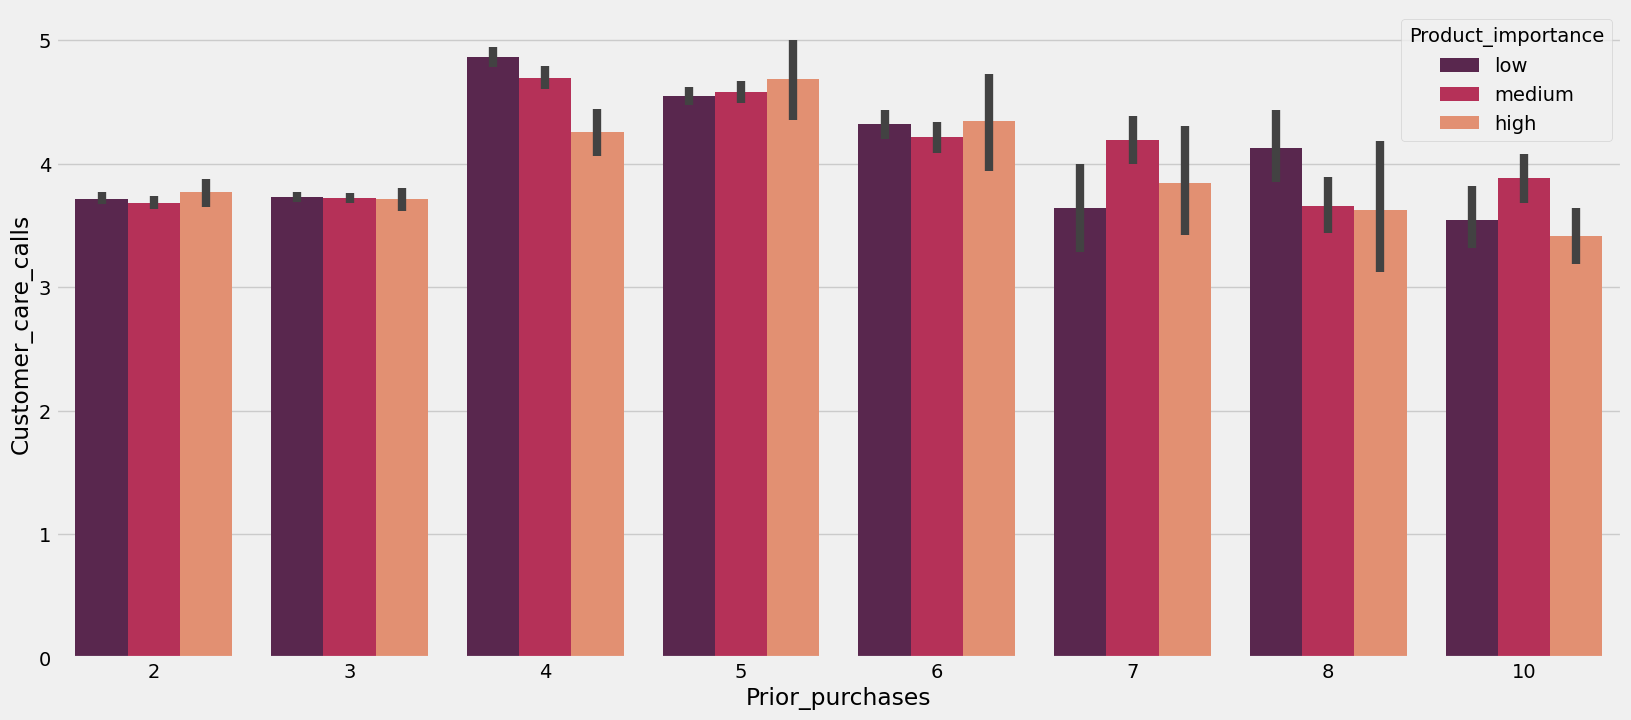

In [37]:
plt.figure(figsize = (18, 8))
sns.barplot(x = 'Prior_purchases', y = 'Customer_care_calls', data = df, hue = 'Product_importance',
            palette = 'rocket')
plt.show()

### Does prior purchases effect cost of the products?

In [38]:
# making boxplot between prior purchases and cost of product to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Cost_of_the_Product', data_frame = df, color = 'Prior_purchases',template = 'plotly_dark')

In [39]:
# making boxplot between prior purchases, cost of product and whether or not the product will reach on time or not
# to see that is there any relation between them.

px.box(x = 'Prior_purchases', y = 'Cost_of_the_Product', data_frame = df, color = 'Reached.on.Time_Y.N',
       template = 'plotly_dark')

### Categorical Variable Encoding

In [40]:
# encoding categorical variables

df['Warehouse_block'] = df['Warehouse_block'].map({'A' : 0, 'B': 1, 'C': 2, 'D':3, 'F': 4})
df['Mode_of_Shipment'] = df['Mode_of_Shipment'].map({'Flight' : 0, 'Ship': 1, 'Road': 2})
df['Product_importance'] = df['Product_importance'].map({'low' : 0, 'medium': 1, 'high': 2})
df['Gender'] = df['Gender'].apply(lambda val: 1 if val == 'M' else 0)

In [41]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,0,44,1233,1
1,4,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1


In [42]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [44]:
# Scaling the data using standardscaler

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC()),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

model_metrics = {}

for model_name, model in models:

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    model_metrics[model_name] = {
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{model_metrics[model_name]['Classification Report']}")
    print(f"Confusion Matrix:\n{model_metrics[model_name]['Confusion Matrix']}")
    print("\n" + "="*50)

Model: Logistic Regression
Accuracy: 0.6331
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.57      0.56      1135
           1       0.69      0.68      0.68      1615

    accuracy                           0.63      2750
   macro avg       0.62      0.62      0.62      2750
weighted avg       0.63      0.63      0.63      2750

Confusion Matrix:
[[ 649  486]
 [ 523 1092]]

Model: Decision Tree
Accuracy: 0.6462
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1135
           1       0.70      0.70      0.70      1615

    accuracy                           0.65      2750
   macro avg       0.63      0.63      0.63      2750
weighted avg       0.65      0.65      0.65      2750

Confusion Matrix:
[[ 643  492]
 [ 481 1134]]

Model: Random Forest
Accuracy: 0.6520
Classification Report:
              precision    recall  f1-score   support

          

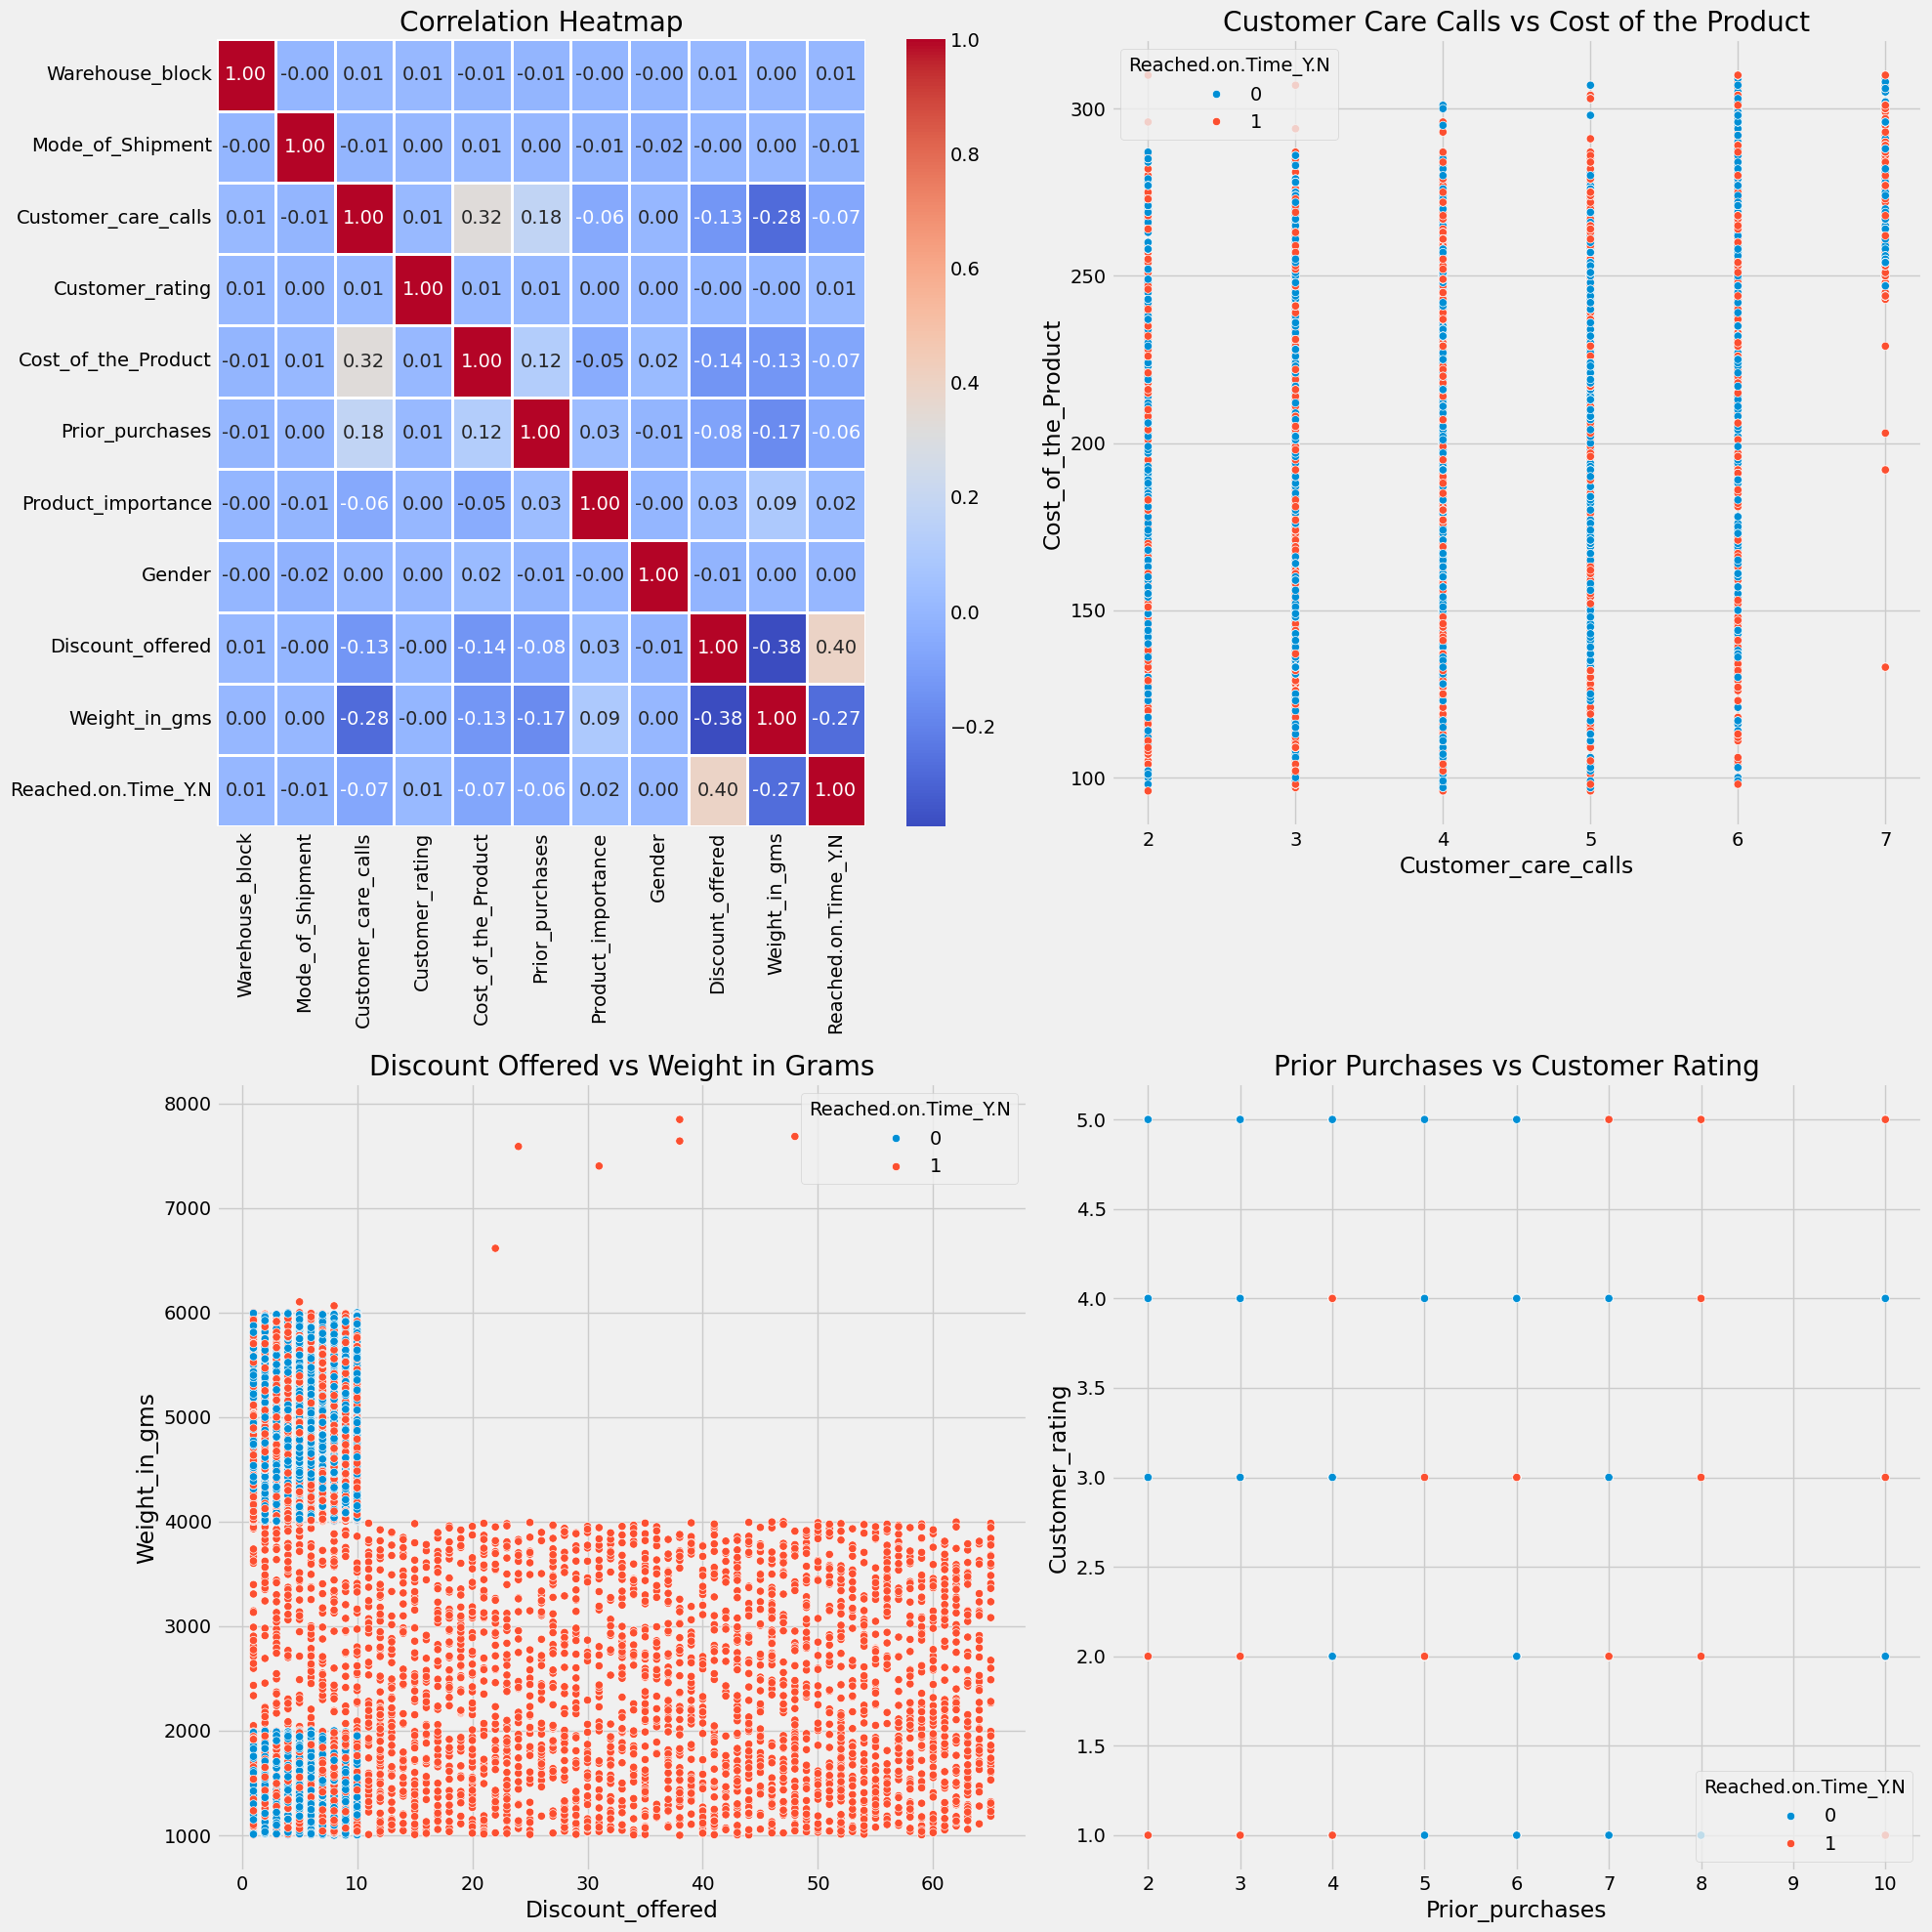

In [46]:
plt.figure(figsize=(20, 20))

# Visualizing correlation heatmap for numeric features
plt.subplot(2, 2, 1)
sns.heatmap(df.corr(), annot=True, fmt='0.2f', cmap='coolwarm', linewidths=2)
plt.title('Correlation Heatmap')

# Visualizing relation between 'Customer_care_calls' and 'Cost_of_the_Product'
plt.subplot(2, 2, 2)
sns.scatterplot(x='Customer_care_calls', y='Cost_of_the_Product', data=df, hue='Reached.on.Time_Y.N')
plt.title('Customer Care Calls vs Cost of the Product')

# Visualizing relation between 'Discount_offered' and 'Weight_in_gms'
plt.subplot(2, 2, 3)
sns.scatterplot(x='Discount_offered', y='Weight_in_gms', data=df, hue='Reached.on.Time_Y.N')
plt.title('Discount Offered vs Weight in Grams')

# Visualizing relation between 'Prior_purchases' and 'Customer_rating'
plt.subplot(2, 2, 4)
sns.scatterplot(x='Prior_purchases', y='Customer_rating', data=df, hue='Reached.on.Time_Y.N')
plt.title('Prior Purchases vs Customer Rating')

plt.tight_layout()
plt.show()


In [47]:
from sklearn.model_selection import GridSearchCV

# hyperparameter tuning using GridSearchCV on RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestClassifier()

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f"Best parameters for Random Forest: {grid_search.best_params_}")
print(f"Best score for Random Forest: {grid_search.best_score_}")


Best parameters for Random Forest: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 100}
Best score for Random Forest: 0.6840835033169782


In [48]:
from sklearn.model_selection import cross_val_score

for model_name, model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} - Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Logistic Regression - Cross-Validation Accuracy: 0.6366
Decision Tree - Cross-Validation Accuracy: 0.6358
Random Forest - Cross-Validation Accuracy: 0.6604
Support Vector Machine - Cross-Validation Accuracy: 0.6587
K-Nearest Neighbors - Cross-Validation Accuracy: 0.6378


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred_scaled = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_scaled)
    print(f"{model_name} - Scaled Accuracy: {accuracy:.4f}")


Logistic Regression - Scaled Accuracy: 0.6331
Decision Tree - Scaled Accuracy: 0.6433
Random Forest - Scaled Accuracy: 0.6582
Support Vector Machine - Scaled Accuracy: 0.6727
K-Nearest Neighbors - Scaled Accuracy: 0.6498


                          Accuracy Precision    Recall  F1-Score   ROC-AUC  \
Logistic Regression           0.92  0.914894  0.914894  0.914894  0.977017   
Random Forest                0.955  0.929293  0.978723  0.953368  0.988157   
Support Vector Classifier     0.98   0.96875  0.989362  0.978947  0.998093   
K-Nearest Neighbors           0.97  0.958333  0.978723  0.968421  0.986602   

                              Confusion Matrix  
Logistic Regression         [[98, 8], [8, 86]]  
Random Forest               [[99, 7], [2, 92]]  
Support Vector Classifier  [[103, 3], [1, 93]]  
K-Nearest Neighbors        [[102, 4], [2, 92]]  


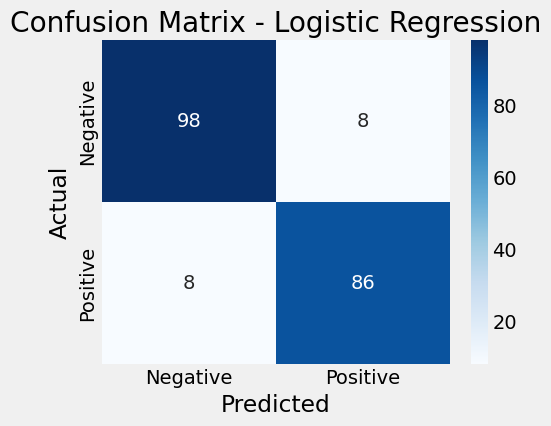

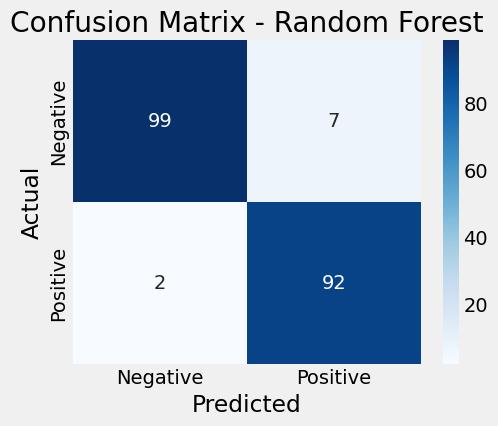

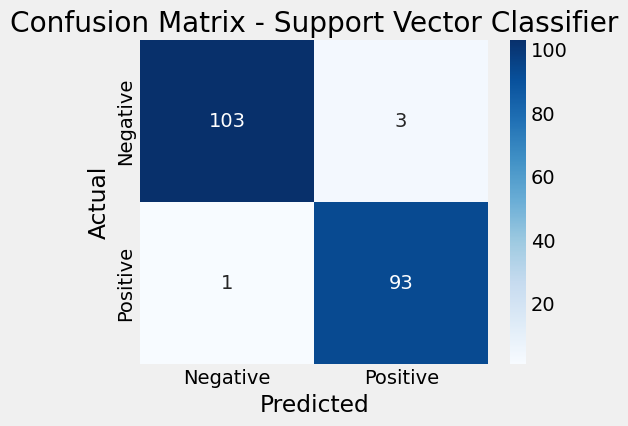

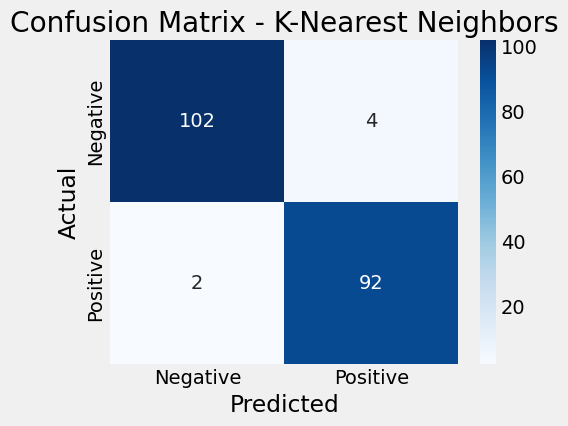

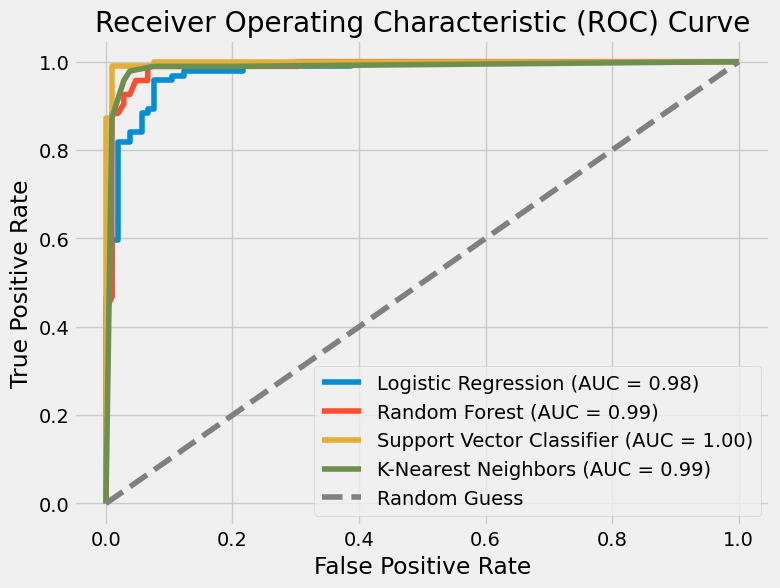

In [50]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    random_state=42,
    class_sep=1.5
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Classifier', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

results = {}

for model_name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    roc_auc = roc_auc_score(y_test, y_probs)
    cm = confusion_matrix(y_test, y_pred)

    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'Confusion Matrix': cm
    }

comparison_df = pd.DataFrame(results).T
print(comparison_df)

for model_name, metrics in results.items():
    cm = metrics['Confusion Matrix']
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plt.figure(figsize=(8, 6))
for model_name, model in models:
    y_probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [53]:
from joblib import dump

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train, y_train)

dump(final_model, 'best_model_random_forest.joblib')
print("Random Forest model saved successfully!")


Random Forest model saved successfully!


## Conclusion:

In this project, we successfully built and evaluated multiple machine learning models to predict the likelihood of "Reached on time" using various metrics like Accuracy, Precision, Recall, F1-Score, and ROC-AUC. Among the models tested—Logistic Regression, Random Forest, Support Vector Classifier, and K-Nearest Neighbors—Random Forest emerged as the most reliable choice.

